## Importing Libraries

In [19]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report 
import lightgbm as lgb

# Utilites
import warnings
import gc
warnings.filterwarnings("ignore")

# Display settings 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load the Data

In [24]:
# A command that measures how long the cell takes to execute
# %%time


# Load the transaction data into dataframes
train_transaction = pd.read_csv("../data/train_transaction.csv")
test_transaction = pd.read_csv("../data/test_transaction.csv")

# Load identity data into dataframes
train_identity = pd.read_csv("../data/train_identity.csv")
test_identity = pd.read_csv("../data/test_identity.csv")

# Prints when all 4 CSV files loaded with no errors
print("Data loaded successfully!")

# Prints the dimensions of the data we loaded
print(f"\nTrain transaction shape: {train_transaction.shape}")
print(f"\nTrain identity shape: {train_identity.shape}")
print(f"\nTest transaction shape: {test_transaction.shape}")
print(f"\nTest identity shape: {test_identity.shape}")

Data loaded successfully!

Train transaction shape: (590540, 394)

Train identity shape: (144233, 41)

Test transaction shape: (506691, 393)

Test identity shape: (141907, 41)


## Merge the Datasets

In [25]:
# Merge the transaction and the identity data dataframes
train = train_transaction.merge(train_identity, on = "TransactionID", how = "left")
test = test_transaction.merge(test_identity, on = "TransactionID", how = "left")

# Cleans to save memory, no longer needed after merging
del train_transaction, train_identity, test_transaction, test_identity
# Forces python to clean right away
gc.collect()

# Prints when done merging with no errors
print(f"Train shape after merging: {train.shape}")
print(f"Test shape after merging: {test.shape}")

Train shape after merging: (590540, 434)
Test shape after merging: (506691, 433)


## Looking at the Data

In [26]:
# Displays first few rows
print("First 5 rows of training data")
display(train.head())

# Displays how much columns have each data type
print("\nData Types:")
print(train.dtypes.value_counts())

# Displays the rows with the most missing values
print("\nMissing values (top 20):")
missing = (train.isnull().sum() / len(train) * 100).sort_values(ascending = False)
print(missing.head(20))

First 5 rows of training data


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0


Data Types:
float64    399
object      31
int64        4
Name: count, dtype: int64

Missing values (top 20):
id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
id_26    99.125715
id_27    99.124699
id_23    99.124699
id_22    99.124699
dist2    93.628374
D7       93.409930
id_18    92.360721
D13      89.509263
D14      89.469469
D12      89.041047
id_03    88.768923
id_04    88.768923
D6       87.606767
id_33    87.589494
id_10    87.312290
dtype: float64


## Target Variable Analysis

Target Distribution:
isFraud
0    569877
1     20663
Name: count, dtype: int64

 Fraud Rate: 3.50%


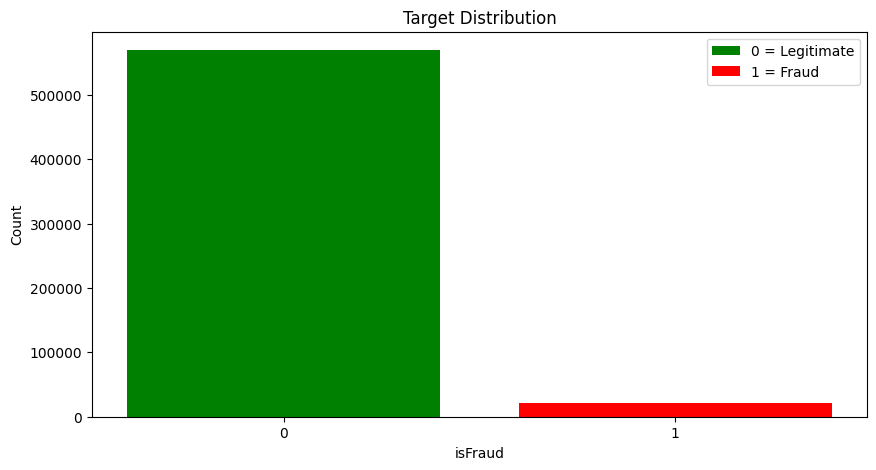

In [27]:
# Checks the distribution of the fraud rate
print("Target Distribution:")
print(train["isFraud"].value_counts())
print(f"\n Fraud Rate: {train["isFraud"].mean() * 100:.2f}%")

# Visualize
plt.figure(figsize = (10, 5))
fraud_counts = train["isFraud"].value_counts()
plt.bar(0, fraud_counts[0], color = "green", label = "0 = Legitimate")
plt.bar(1, fraud_counts[1], color = "red", label = "1 = Fraud")
plt.title("Target Distribution")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.legend()
plt.show();

## Analyze Transcation Amounts

Transcation Amount Statistics:
            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  


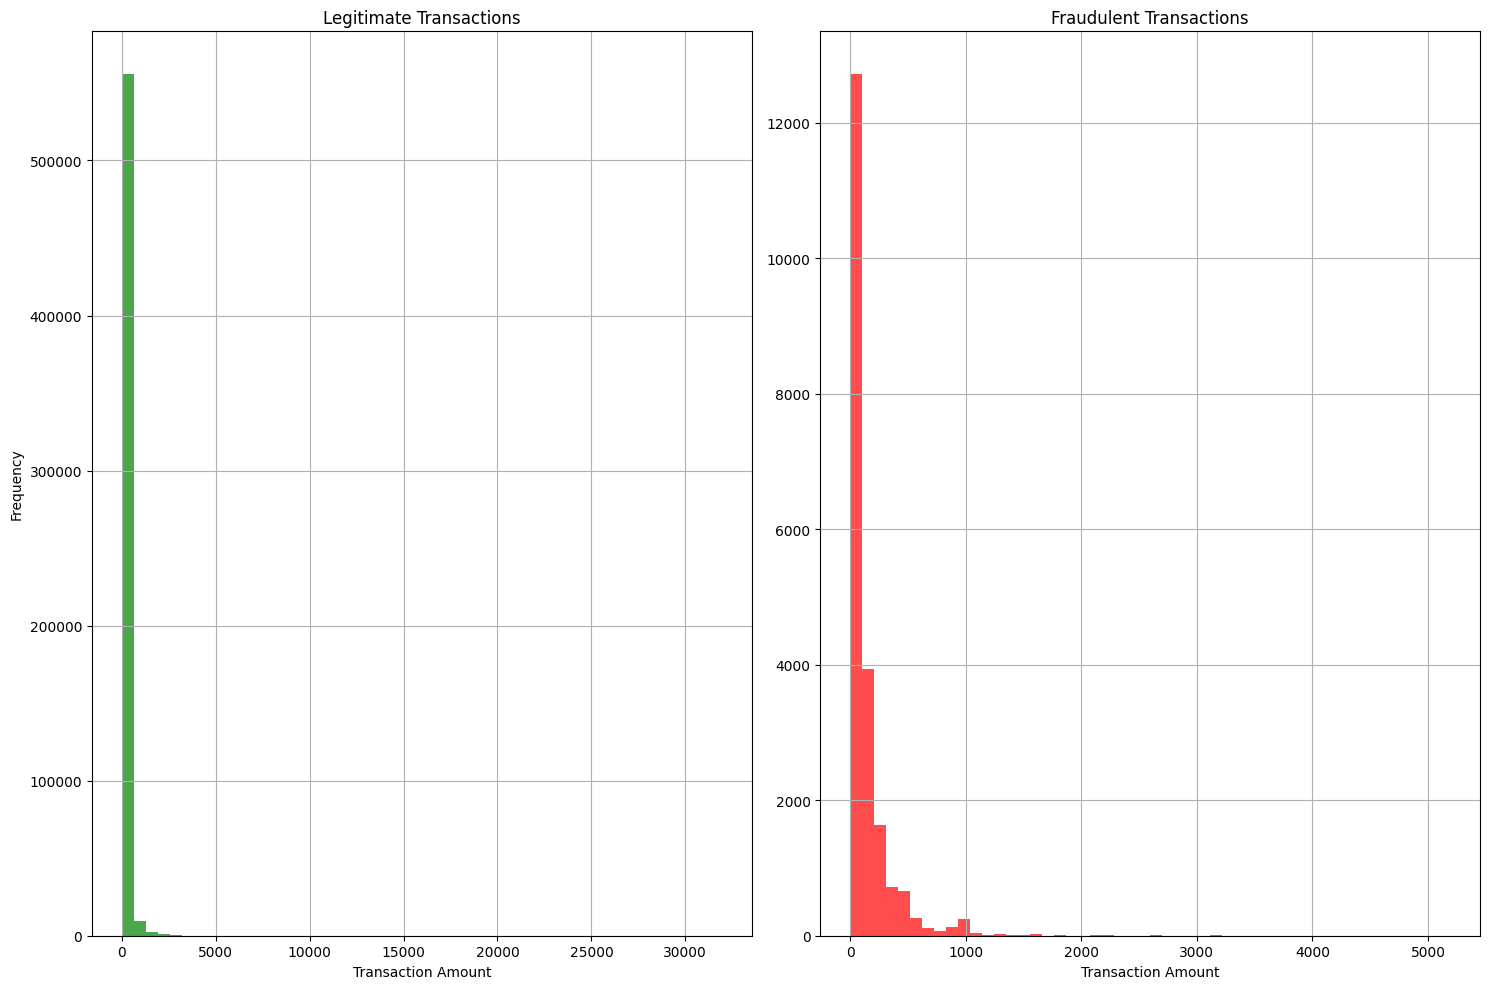

In [28]:
# Look at the transcation amount for fraud vs legitimate
print("Transcation Amount Statistics:")
print(train.groupby("isFraud")["TransactionAmt"].describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

# Distribution by fraud status 
train[train["isFraud"] == 0]["TransactionAmt"].hist(bins = 50, ax = axes[0], color = "green", alpha = 0.7)
axes[0].set_title("Legitimate Transactions")
axes[0].set_xlabel("Transaction Amount")
axes[0].set_ylabel("Frequency")

train[train["isFraud"] == 1]["TransactionAmt"].hist(bins = 50, ax = axes[1], color = "red", alpha = 0.7)
axes[1].set_title("Fraudulent Transactions")
axes[1].set_xlabel("Transaction Amount")

plt.tight_layout()
plt.show();

## Check Missing Values

Total columns with missing values: 414

 Top 20 columns with most missing values:
   Column  Missing_Percent
0   id_24        99.196159
1   id_25        99.130965
2   id_07        99.127070
3   id_08        99.127070
4   id_21        99.126393
5   id_26        99.125715
6   id_27        99.124699
7   id_23        99.124699
8   id_22        99.124699
9   dist2        93.628374
10     D7        93.409930
11  id_18        92.360721
12    D13        89.509263
13    D14        89.469469
14    D12        89.041047
15  id_03        88.768923
16  id_04        88.768923
17     D6        87.606767
18  id_33        87.589494
19  id_10        87.312290


<Figure size 1200x600 with 0 Axes>

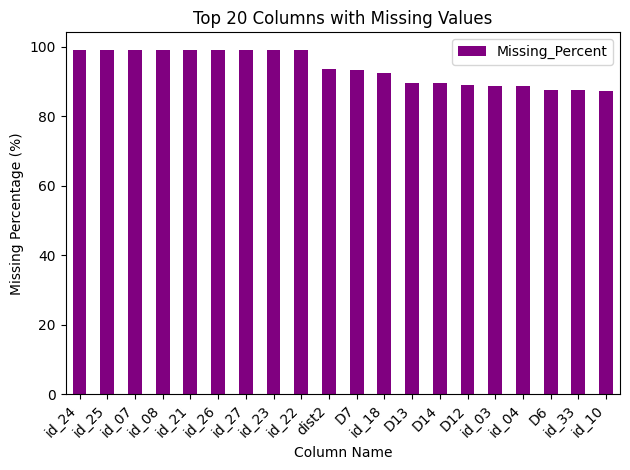

In [29]:
# Calculate missing percentage
missing = (train.isnull().sum() / len(train) * 100).sort_values(ascending = False)
missing_df = pd.DataFrame({"Column": missing.index, "Missing_Percent": missing.values})
missing_df = missing_df[missing_df["Missing_Percent"] > 0]

print(f"Total columns with missing values: {len(missing_df)}")
print("\n Top 20 columns with most missing values:")
print(missing_df.head(20))

#Visualize
plt.figure(figsize = (12, 6));
missing_df.head(20).plot(x = "Column", y = "Missing_Percent", kind = "bar", color = "purple")
plt.title("Top 20 Columns with Missing Values")
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Column Name")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show();

## Analyze Product Codes

ProductCD Distribution:
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

Fraud Rate by Product
           Fraud_Count   Total  Fraud_Rate
ProductCD                                 
C                 8008   68519   11.687269
H                 1574   33024    4.766231
R                 1426   37699    3.782594
S                  686   11628    5.899553
W                 8969  439670    2.039939


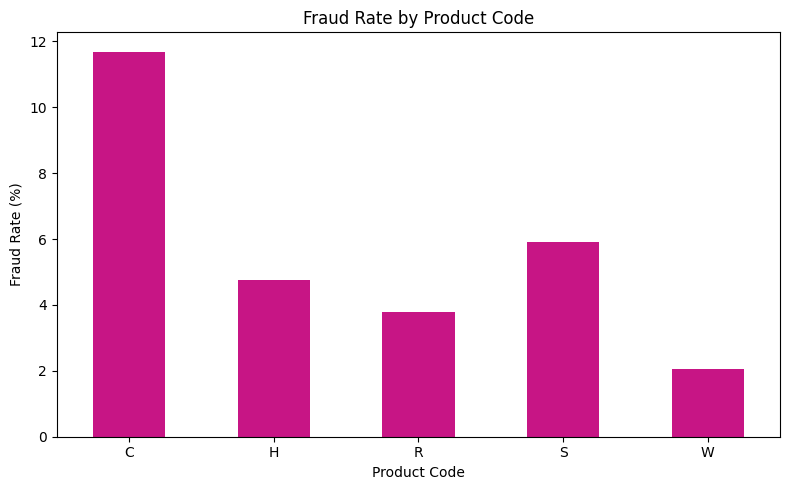

In [30]:
# Look at ProductCD distribution
print("ProductCD Distribution:")
print(train["ProductCD"].value_counts())

# Fraud rate by product
fraud_product = train.groupby("ProductCD")["isFraud"].agg(["sum", "count", "mean"])
fraud_product.columns = ["Fraud_Count", "Total", "Fraud_Rate"]
fraud_product["Fraud_Rate"] = fraud_product["Fraud_Rate"] * 100
print("\nFraud Rate by Product")
print(fraud_product)

# Visualize
plt.figure(figsize = (8, 5))
fraud_product["Fraud_Rate"].plot(kind = "bar", color = "mediumvioletred")
plt.title("Fraud Rate by Product Code")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Product Code")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show();

## Add Card Analysis

In [31]:
# Analyze card 1
print("Card 1 - Unique values:", train["card1"].nunique())
print("\nTop 10 most common cards:")
print(train["card1"].value_counts().head(10))

# Fraud rate by card frquency
card_freq = train.groupby("card1").size()
card_fraud = train.groupby("card1")["isFraud"].mean()

card_analysis = pd.DataFrame({"frequency": card_freq, "fraud_rate": card_fraud})

# Categorize by frequency
card_analysis["freq_category"] = pd.cut(card_analysis["frequency"],
                                        bins = [0, 10, 50, 100, 1000],
                                        labels = ["Very Rare", "Rare", "Common", "Very Common"])
print("\nFraud rate by card frequency")
print(card_analysis.groupby("freq_category")["fraud_rate"].mean() * 100)

Card 1 - Unique values: 13553

Top 10 most common cards:
card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
12695     7091
12544     6773
6019      6771
2803      6141
7585      5334
Name: count, dtype: int64

Fraud rate by card frequency
freq_category
Very Rare      3.388975
Rare           2.452009
Common         2.805605
Very Common    3.918779
Name: fraud_rate, dtype: float64


## Feature Engineering

In [32]:
# Create a copy to work with
train_fe = train.copy()
test_fe = test.copy()

print("Starting feature engineering...")

# Transaction amount features
train_fe["TransactionAmt_log"] = np.log1p(train_fe["TransactionAmt"])
test_fe["TransactionAmt_log"] = np.log1p(test_fe["TransactionAmt"])

# Decimal features
train_fe["TransactionAmt_decimal"] = train_fe["TransactionAmt"] - train_fe["TransactionAmt"].astype(int)
test_fe["TransactionAmt_decimal"] = train_fe["TransactionAmt"] - test_fe["TransactionAmt"].astype(int)

# Email domain features 
if "P_emaildomain" in train_fe.columns:
    train_fe["P_email_is_null"] = train_fe["P_emaildomain"].isnull().astype(int)
    test_fe["R_email_is_null"] = test_fe["R_emaildomain"].isnull().astype(int)
    
if "R_emaildomain" in train_fe.columns:
    train_fe["R_email_is_null"] = train_fe["R_emaildomain"].isnull().astype(int)
    test_fe["R_email_is_null"] = test_fe["R_emaildomain"].isnull().astype(int)

# Transaction hour
train_fe["Transaction_hour"] = (train_fe["TransactionDT"] / 3600) % 24
test_fe["Transaction_hour"] = (test_fe["TransactionDT"] / 3600) % 24

# Transaction day
train_fe["Transaction_day"] = (train_fe["TransactionDT"] / (3600 * 24))
test_fe["Transaction_day"] = (test_fe["TransactionDT"] / (3600 * 24))

print("New features created!")
print(f"Train shape: {train_fe.shape}")
print(f"Test shape: {test_fe.shape}")



Starting feature engineering...
New features created!
Train shape: (590540, 440)
Test shape: (506691, 438)


## Baseline Model - LightGBM

In [40]:
# Prepares features and target
# Remove non feature columns

remove_cols = ["TransactionID", "TransactionDT", "isFraud"]

# Get features that extist in both train and test
train_cols = set(train_fe.columns) - set(remove_cols)
test_cols = set(test_fe.columns) - set(remove_cols)
features = list(train_cols & test_cols)

print(f"Features in train only: {len(train_cols - test_cols)}")
print(f"Features in test only: {len(test_cols - train_cols)}")
print(f"Common features to use: {len(features)}")

# Seperates features and target
X = train_fe[features]
y = train_fe["isFraud"]
X_test = test_fe[features]

print(f"Number of features: {len(features)}")
print(f"Training samples: {len(X)}")
print(f"Test samples: {len(X_test)}")

# Handle categorical columns
cat_cols = X.select_dtypes(include = ["object"]).columns.tolist()
print(f"\nCategorical columns: {len(cat_cols)}")
print(cat_cols[:10])

Features in train only: 39
Features in test only: 38
Common features to use: 398
Number of features: 398
Training samples: 590540
Test samples: 506691

Categorical columns: 16
['M6', 'card6', 'DeviceType', 'M2', 'M5', 'M7', 'DeviceInfo', 'M1', 'M4', 'M9']


## Split Data for Validation

In [41]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 67, stratify = y)

print(f"Train set: {X_train.shape}")
print(f"Valid set: {X_valid.shape}")
print(f"/nTrain fraud rate: {y_train.mean() * 100:.2f}")
print(f"Valid fraud rate: {y_valid.mean() * 100:.2f}")

Train set: (472432, 398)
Valid set: (118108, 398)
/nTrain fraud rate: 3.50
Valid fraud rate: 3.50


## LightGBM Category Type

In [43]:
# Convert categorical columns to "category" dtype for LightGBM
print("Converting categorical columns to category dtype...")
for col in cat_cols:
    X_train[col] = X_train[col].astype("category")
    X_valid[col] = X_valid[col].astype("category")
    X_test[col] = X_test[col].astype("category")

print(f"Converted {len(cat_cols)} columns to category dtype")
print("Data types after conversion")
print(X_train[cat_cols].dtypes)

Converting categorical columns to category dtype...
Converted 16 columns to category dtype
Data types after conversion
M6               category
card6            category
DeviceType       category
M2               category
M5               category
M7               category
DeviceInfo       category
M1               category
M4               category
M9               category
R_emaildomain    category
ProductCD        category
card4            category
M3               category
M8               category
P_emaildomain    category
dtype: object


## Train LightGBM Model

In [44]:
# LightGBM parameter
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': -1
}

# Create datasets
print("Creating LightGBM datasets...")
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = cat_cols)
lgb_valid = lgb.Dataset(X_valid, y_valid, categorical_feature = cat_cols, reference = lgb_train)

# Train model
print("\nTraining LightGBM model...")
model = lgb.train(params,
                  lgb_train,
                  num_boost_round = 1000,
                  valid_sets = [lgb_train, lgb_valid],
                  valid_names = ["train", "valid"],
                  callbacks = [lgb.early_stopping(stopping_rounds = 50), lgb.log_evaluation(period = 100)])

print(f"\nBest iteration: {model.best_iteration}")
print(f"Best validation AUC: {model.best_score["valid"]["auc"]:.4f}")

Creating LightGBM datasets...

Training LightGBM model...
Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.927813	valid's auc: 0.912548
[200]	train's auc: 0.948365	valid's auc: 0.929895
[300]	train's auc: 0.958657	valid's auc: 0.936588
[400]	train's auc: 0.965437	valid's auc: 0.940505
[500]	train's auc: 0.970239	valid's auc: 0.943428
[600]	train's auc: 0.974301	valid's auc: 0.946447
[700]	train's auc: 0.977492	valid's auc: 0.94882
[800]	train's auc: 0.980622	valid's auc: 0.951237
[900]	train's auc: 0.982675	valid's auc: 0.952676
[1000]	train's auc: 0.984606	valid's auc: 0.95382
Did not meet early stopping. Best iteration is:
[1000]	train's auc: 0.984606	valid's auc: 0.95382

Best iteration: 1000
Best validation AUC: 0.9538


## Make Predictions

In [45]:
# Make predictions on the test set
print("Making predictions on test set...")
y_pred_test = model.predict(X_test, num_iteration = model.best_iteration)

print(f"Predictions shape: {y_pred_test.shape}")
print(f"Prediction range: [{y_pred_test.min():.4f}, {y_pred_test.max():.4f}]")
print(f"\nSample predictions:")
print(y_pred_test[:10])

Making predictions on test set...
Predictions shape: (506691,)
Prediction range: [0.0000, 0.9999]

Sample predictions:
[0.00330374 0.00293691 0.00299459 0.00083033 0.0009828  0.0093031
 0.01248645 0.01240408 0.00022235 0.00823058]


## Create Submission File

In [46]:
# Create submission dataframe
submission = pd.DataFrame({"TransactionID": test_fe["TransactionID"], "isFraud": y_pred_test})

# Save to CSV
submission.to_csv("submission.csv", index = False)

print("Submission file created!")
print(f"Shape: {submission.shape}")
print("\nFirst few rows:")
print(submission.head(10))
print("\nLast few rows:")
print(submission.tail(10))
print("\nSubmission file saved as 'submission.csv'")

Submission file created!
Shape: (506691, 2)

First few rows:
   TransactionID   isFraud
0        3663549  0.003304
1        3663550  0.002937
2        3663551  0.002995
3        3663552  0.000830
4        3663553  0.000983
5        3663554  0.009303
6        3663555  0.012486
7        3663556  0.012404
8        3663557  0.000222
9        3663558  0.008231

Last few rows:
        TransactionID   isFraud
506681        4170230  0.019088
506682        4170231  0.028212
506683        4170232  0.003572
506684        4170233  0.012690
506685        4170234  0.010956
506686        4170235  0.015199
506687        4170236  0.008785
506688        4170237  0.004235
506689        4170238  0.007206
506690        4170239  0.003710

Submission file saved as 'submission.csv'
